In [1]:
%matplotlib inline
import proj1_helpers as utils
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload
import algorithms as ML_alg
import preprocessing_functions as prf

(y, tx, event_ids) = utils.load_csv_data("train.csv")



OSError: train.csv not found.

In [10]:
from matplotlib.mlab import PCA

#(tx_clean, y_clean) = prf.clean_data(prf.standardize(tx), y)

(tx_clean, y_clean) = prf.clean_data(tx,y)

tx_clean = prf.standardize(tx_clean)

pca = PCA(tx_clean)
pca.Wt[0]
tx_clean.std(axis = 0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

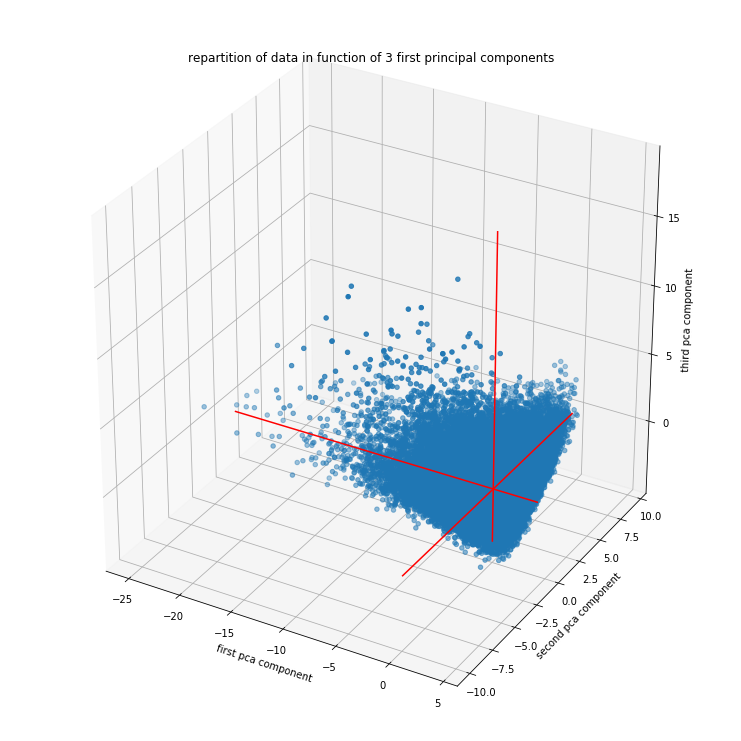

In [11]:
from mpl_toolkits.mplot3d import Axes3D

x = []
y = []
z = []
for item in pca.Y:
 x.append(item[0])
 y.append(item[1])
 z.append(item[2])

plt.close('all') # close all latent plotting windows
fig1 = plt.figure(figsize=[10,10]) # Make a plotting figure
ax = Axes3D(fig1) # use the plotting figure to create a Axis3D object.
pltData = [x,y,z] 
ax.scatter(pltData[0], pltData[1], pltData[2], 'bo') # make a scatter plot of blue dots from the data
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis 
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.
yAxisLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r') # make a red line for the y-axis.
zAxisLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2]))) # 2 points make the z-axis line at the data extrema along z-axis
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r') # make a red line for the z-axis.
 
# label the axes 
ax.set_xlabel("first pca component") 
ax.set_ylabel("second pca component")
ax.set_zlabel("third pca component")
ax.set_title("repartition of data in function of 3 first principal components")
plt.show() # show the plot

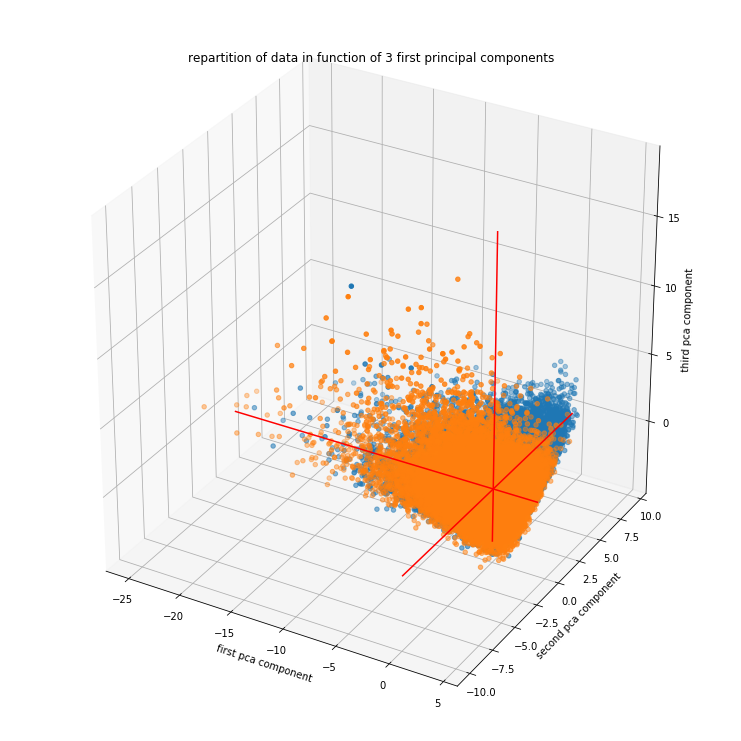

In [12]:
x_p1 = []
x_m1 = []
y_p1 = []
y_m1 = []
z_p1 = []
z_m1 = []
for i in range(pca.Y.shape[0]):
    if (y_clean[i] == 1):
        x_p1.append(pca.Y[i,0])
        y_p1.append(pca.Y[i,1])
        z_p1.append(pca.Y[i,2])
    if (y_clean[i] == -1):
        x_m1.append(pca.Y[i,0])
        y_m1.append(pca.Y[i,1])
        z_m1.append(pca.Y[i,2])
 

plt.close('all') # close all latent plotting windows
fig1 = plt.figure(figsize=[10,10]) # Make a plotting figure
ax = Axes3D(fig1) # use the plotting figure to create a Axis3D object.
pltData_p1 = [x_p1,y_p1,z_p1]
pltData_m1 = [x_m1,y_m1,z_m1]
ax.scatter(pltData_p1[0], pltData_p1[1], pltData_p1[2], 'bo')
ax.scatter(pltData_m1[0], pltData_m1[1], pltData_m1[2], 'ro')# make a scatter plot of red dots from the data
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis 
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.
yAxisLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r') # make a red line for the y-axis.
zAxisLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2]))) # 2 points make the z-axis line at the data extrema along z-axis
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r') # make a red line for the z-axis.
 
# label the axes 
ax.set_xlabel("first pca component") 
ax.set_ylabel("second pca component")
ax.set_zlabel("third pca component")
ax.set_title("repartition of data in function of 3 first principal components")
plt.show() # show the plot

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


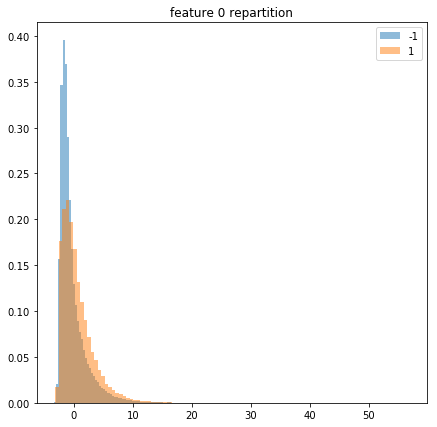

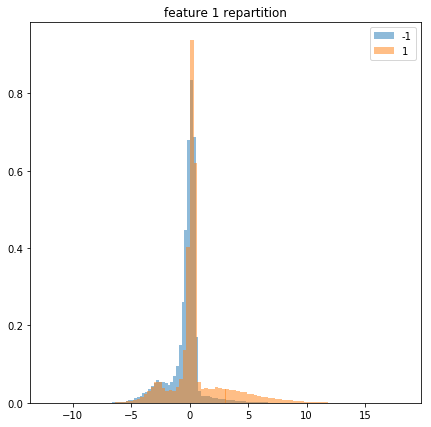

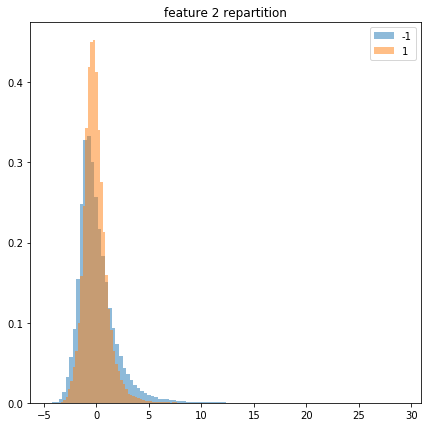

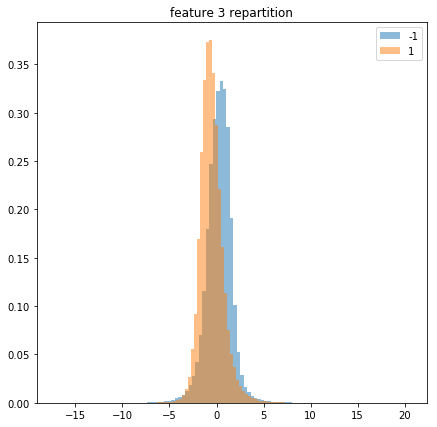

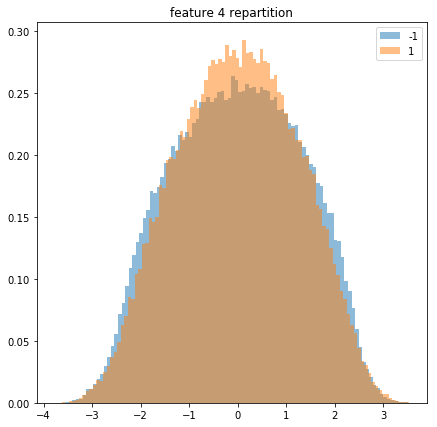

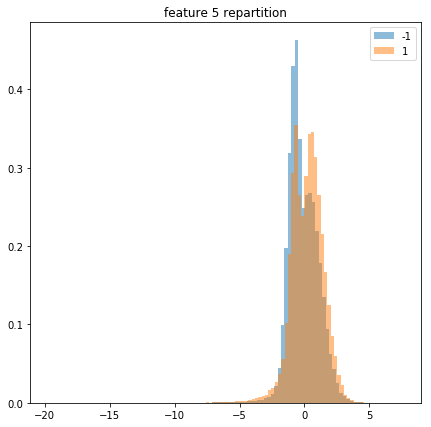

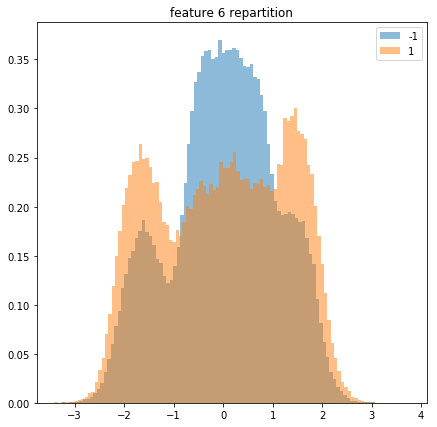

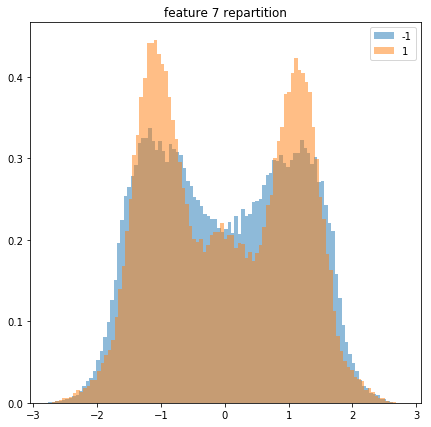

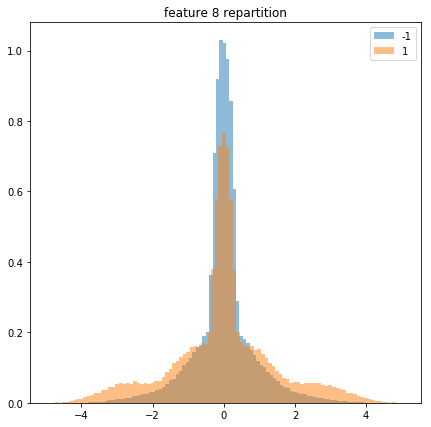

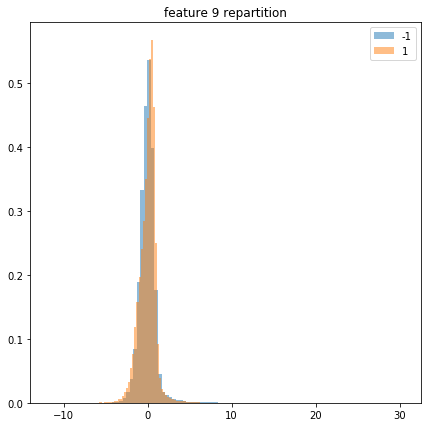

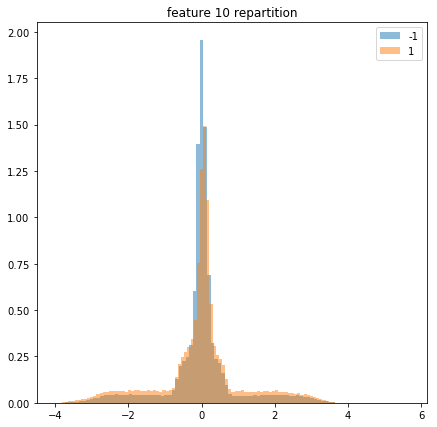

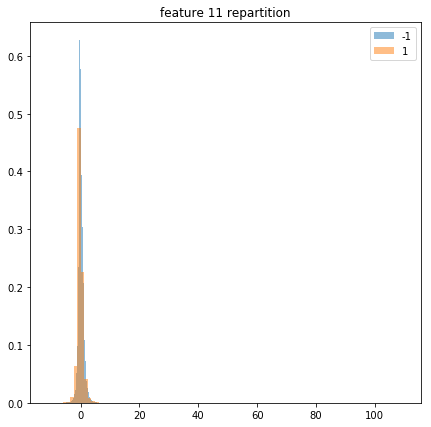

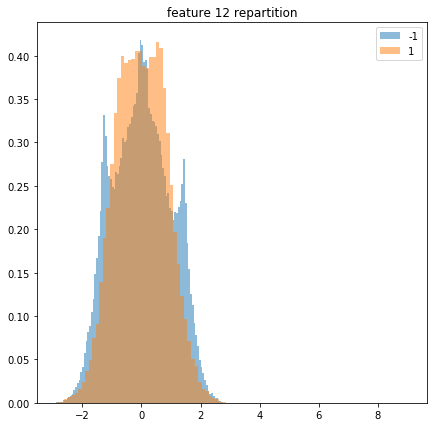

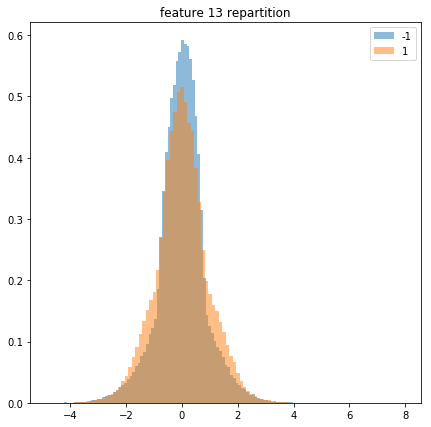

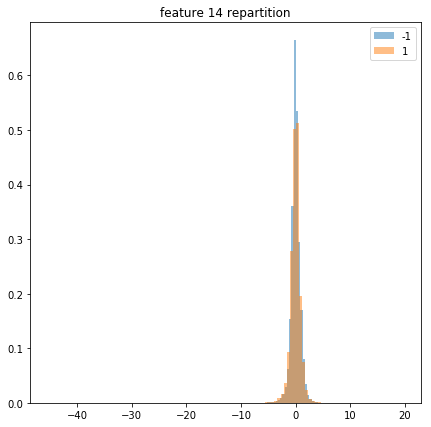

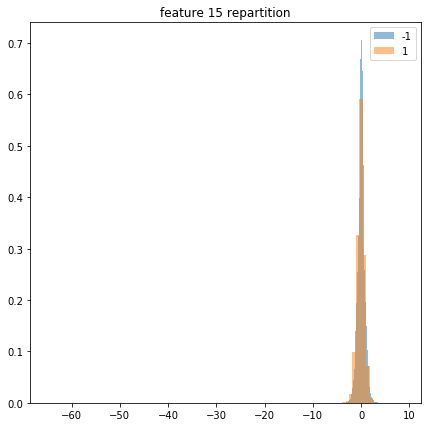

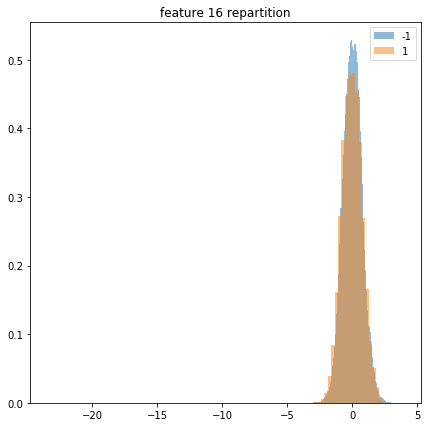

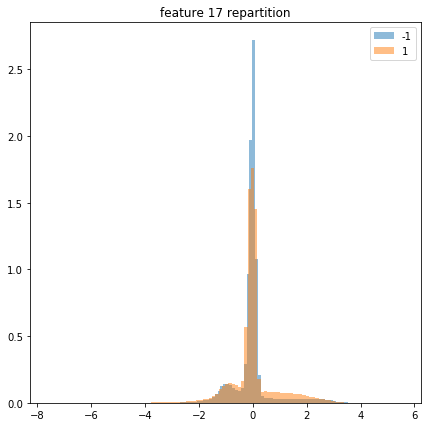

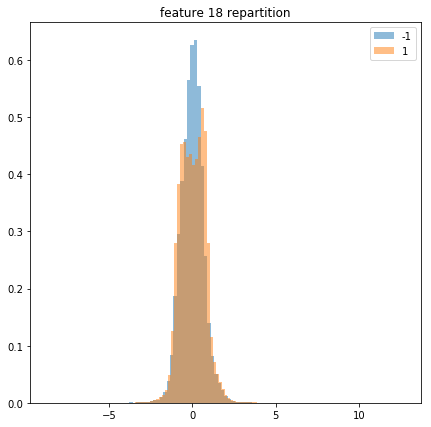

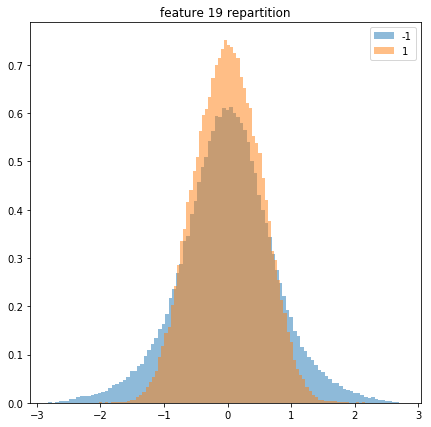

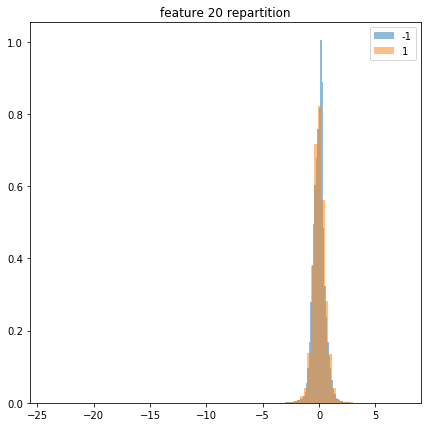

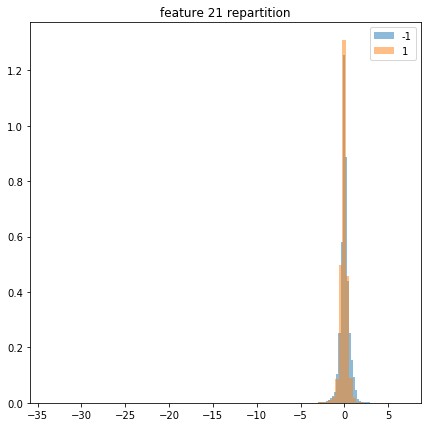

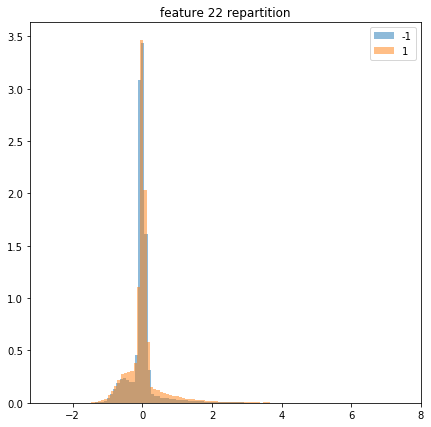

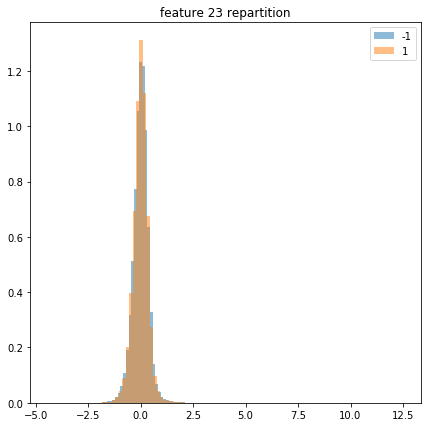

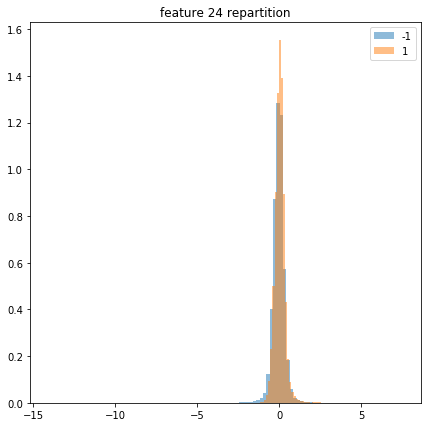

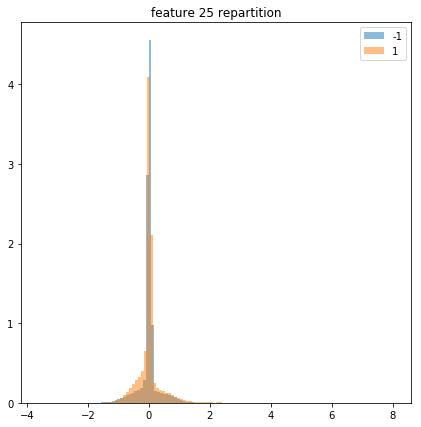

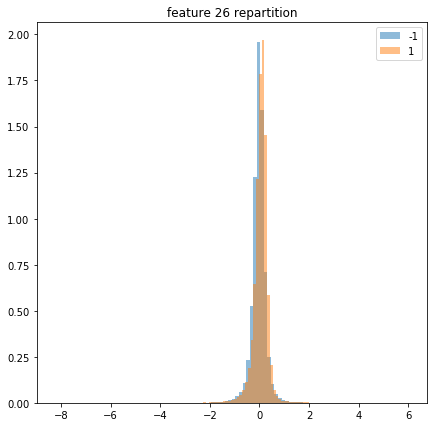

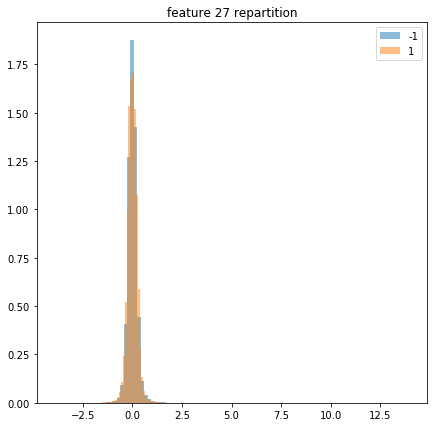

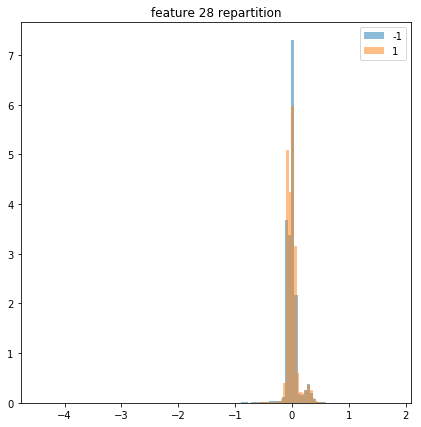

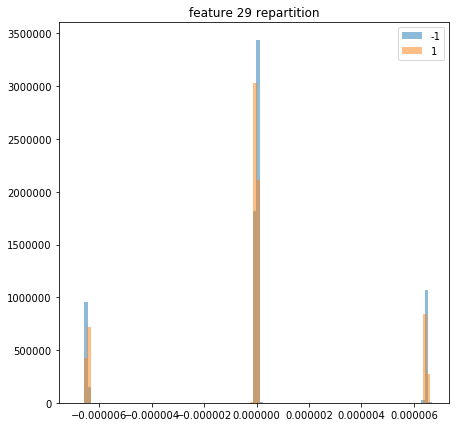

In [14]:
(pca_p1, pca_m1 ) = prf.differentiate_two_categories(pca.Y, y_clean)

for i in range(30):
    prf.plothisto(tx_p1=pca_p1, tx_m1= pca_m1, n_feature=i, save_path='./figs/pca_standardized_repartition/')


In [15]:
(tx_p1, tx_m1 ) = prf.differentiate_two_categories(tx_clean, y_clean)

pca_p1 = PCA(tx_p1)
pca_m1 = PCA(tx_m1)

print(pca_p1.Wt[0] - pca_m1.Wt[0])

[ -5.46916144e-02   8.58517938e-02   4.71261547e-02  -7.03432244e-01
   8.49864369e-02  -6.52102904e-02  -3.73231294e-02   4.61347235e-01
  -3.29270539e-01  -7.49228229e-01  -1.06098002e-01  -3.76639397e-01
   3.13504180e-02  -3.18427669e-01  -4.47274507e-04  -6.15092097e-03
  -3.24816642e-01  -5.66621113e-03   3.62885909e-03  -4.94914798e-01
  -4.92478941e-03  -7.09324943e-01  -5.74209662e-01  -5.58771793e-01
  -6.76009387e-04  -2.29484918e-03  -3.15147116e-01   1.03131727e-04
   5.09108456e-03  -7.39938779e-01]
